# Logistic Regression

### data: 성별 소득 data 에 따라 특정 구매자의 구매할지 여부를 예측

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

dataset = pd.read_csv('datasets/Social_Network_Ads.csv')

In [2]:
dataset.tail()

,User ID,Gender,Age,EstimatedSalary,Purchased
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0
399,15594041,Female,49,36000,1


In [3]:
dataset['Purchased'].value_counts()

0    257
1    143
Name: Purchased, dtype: int64

### Age, EstimatedSalary 를 변수로 선택

In [4]:
X = dataset.iloc[:, [2,3]].values.astype("float32")
y = dataset.iloc[:, 4].values.astype("float32")

dataset 을 Training 과 Test set 으로 분리

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Feature Scaling

In [6]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test  = sc.transform(X_test)

In [7]:
X_train.shape

(320, 2)

### Training set 에 대해 Logistic Regression model 을 fitting

In [8]:
lr_classifier = LogisticRegression(solver='lbfgs', random_state=0)
lr_classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

### Test Set 을 이용한 predict

In [9]:
y_pred = lr_classifier.predict(X_test)

print("Test set true counts = ", sum(y_test))
print("predicted true counts = ", sum(y_pred))

Test set true counts =  22.0
predicted true counts =  18.0


In [10]:
threshold = 0.5

In [11]:
y_pred_proba = lr_classifier.predict_proba(X_test)[:,1]
print("Counts of y_pred_proba > {} : ".format(threshold), sum(y_pred_proba > threshold))

Counts of y_pred_proba > 0.5 :  18


### confusion matrix 를 이용한 model 평가

In [15]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import  accuracy_score, precision_score, recall_score, roc_curve, roc_auc_score
from sklearn.model_selection import cross_val_predict

In [16]:
print("confution matrix\n", confusion_matrix(y_test, y_pred, labels=[1, 0]))
print()
print("classification report\n", classification_report(y_test, y_pred, labels=[1, 0]))

confution matrix
 [[17  5]
 [ 1 57]]

classification report
               precision    recall  f1-score   support

           1       0.94      0.77      0.85        22
           0       0.92      0.98      0.95        58

   micro avg       0.93      0.93      0.93        80
   macro avg       0.93      0.88      0.90        80
weighted avg       0.93      0.93      0.92        80



### accuracy_score, precision_score, recall_score test

In [17]:
print("Accuracy: {:.2f}".format(accuracy_score(y_test, y_pred)))
print("Precision: {:.2f}".format(precision_score(y_test, y_pred, labels=[1, 0])))
print("Recall: {:.2f}".format(recall_score(y_test, y_pred, labels=[1, 0])))

Accuracy: 0.93
Precision: 0.94
Recall: 0.77


## Visualization

roc_curve(y_true, y_score)  

fpr - false positive rates,  tpr - true positive rates

In [34]:
y_probas = cross_val_predict(lr_classifier, X_train, y_train, cv=5, method='predict_proba')
y_scores = y_probas[:,1]

fpr, tpr, _ = roc_curve(y_train, y_scores)
auc = roc_auc_score(y_train, y_scores)

Text(0.5, 1.0, 'ROC Curve')

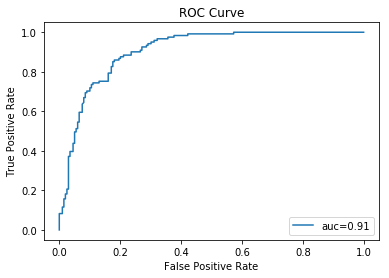

In [35]:
plt.plot(fpr, tpr, label="auc="+ "{:.2f}".format(auc))
plt.legend(loc=4)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


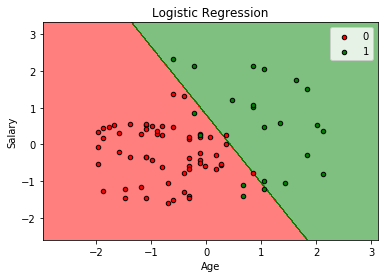

In [51]:
from matplotlib.colors import ListedColormap

#X_set, y_set = X_train, y_train
X_set, y_set = X_test, y_test

X1, X2 = np.meshgrid(np.arange(X_set[:,0].min()-1, X_set[:,0].max()+1, 0.01),
                                 np.arange(X_set[:,1].min()-1, X_set[:,1].max()+1, 0.01))

XX = np.c_[X1.ravel(), X2.ravel()]

Y = np.array(lr_classifier.predict_proba(XX)[:, 1] > threshold).reshape(X1.shape)

plt.contourf(X1, X2, Y, cmap=ListedColormap(('red', 'green')), alpha=0.5)

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], s=20, c=ListedColormap(["red", "green"])(i), label=i, edgecolor='k')
    
plt.title('Logistic Regression')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.legend()

# 실습 

### 통신회사의 고객 이탈 여부를 logistic regression 으로 예측

In [52]:
churn_df = pd.read_csv("datasets/ChurnData.csv")

## Data pre-processing and feature selection

개별 feature 에 대한 분석 후(본 과정에서는 생략)에 Logistic Regression 에 사용할 feature 선정

tenure(가입기간), age (연령), income(수입) 으로 예측하고 churn (이탈여부) 은 integer 로 type 변경

In [53]:
churn_df.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0


In [54]:
churn_df = churn_df[['tenure', 'age', 'income', 'churn']]
churn_df['churn'] = churn_df['churn'].astype('int')
churn_df.head()

,tenure,age,income,churn
0,11.0,33.0,136.0,1
1,33.0,33.0,33.0,1
2,23.0,30.0,30.0,0
3,38.0,35.0,76.0,0
4,7.0,35.0,80.0,0


In [55]:
X = churn_df[['tenure', 'age', 'income']]
y = churn_df[['churn']]

### data scaling

In [ ]:
# your code here

### Train/Test dataset 분리

In [ ]:
# your code here

In [ ]:
# train the model

In [ ]:
# predict

In [ ]:
# confusion matrix 작성

In [ ]:
print("Accuracy: {:.2f}".format(accuracy_score(y_test, y_pred)))
print("Precision: {:.2f}".format(precision_score(y_test, y_pred)))
print("Recall: {:.2f}".format(recall_score(y_test, y_pred)))